# Generic Exploratory Data Analysis Framework

*Import any dataset and get a processed dataset without any null values, outliers or duplicates*





***Some of the most used variables:***

- data: Dataframe to store dataset
- df: Dataframe of 'data' excluding object-based columns
- obj_df: Dataframe of 'data' with only object-based columns
- x: Dataframe with no 'id' attributes

### Installing required packages

In [1]:
#!pip install jovian --upgrade
#!pip install jovian opendatasets --upgrade --quiet
#!pip install -q kaggle

### Importing required packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import opendatasets as od
import seaborn as sns
%matplotlib inline

In [3]:
#python -m jovian clone nihitkr-chp/project1 
#cd project1

#conda create -n project1 jupyter 

#conda activate project1
#jupyter notebook

Creating a missing_values List:

It is not necessary that a null cell is blank, sometimes a null cell can also have elements like -, --, N/a, etc. which is defined in the missing_values list. So, it will also be treated as a missing vales in the dataset.

In [4]:
# Array to declare all kinds of Null values
missing_values= ["N/a","n/a","N/A","-","--","?", np.nan] 

### Downloading a dataset from kaggle

In [6]:
#dataset_url = 'https://www.kaggle.com/mirichoi0218/insurance' 
#if want to upload any other data from kaggle

In [7]:
#od.download(dataset_url)

In [8]:
data_dir = './datasets' #if any other data is downloaded from internet, mention its directory
filename = os.listdir(data_dir)
filename

['bike.csv',
 'bike.xls',
 'cancer.csv',
 'Case.csv',
 'Data.csv',
 'fifa_eda.csv',
 'hotel_bookings.csv',
 'insurance.csv',
 'Iris.csv',
 'Region.csv',
 'SeoulFloating.csv',
 'toy_dataset.csv',
 'train.csv',
 'Weather.csv',
 'well_log.csv']

In [9]:
#Enter the filename inside the quotes which is to be taken
path = data_dir+'/Data.csv'

name, extension = os.path.splitext(path)

if (extension == '.csv'):
    data_raw = data_raw = pd.read_csv(path, na_values=missing_values)
    print("File type is "+extension)
elif (extension == '.xls' or extension=='.xlsx'):
    data_raw = pd.read_excel(path, na_values=missing_values)
    print("File type is "+extension)
else: 
    print("This is not a supported dataset. Please upload a csv or excel file")

data_raw

File type is .csv


,Country,Age,Current Salary,Starting Salary,Annual Package,Married
0,France,45.0,56000.0,20000.0,692000.0,Yes
1,Spain,26.0,26000.0,10000.0,322000.0,No
2,Germany,26.0,25000.0,10000.0,310000.0,Yes
3,Spain,26.0,NaN,10000.0,790000.0,No
4,Germany,45.0,35000.0,10000.0,430000.0,No
5,France,59.0,9300.0,15000.0,16116.0,No
6,Spain,NaN,56000.0,10000.0,682000.0,Yes
7,France,45.0,42000.0,20000.0,NaN,Yes
8,Germany,25.0,650000.0,30000.0,7830000.0,No
9,France,54.0,NaN,10000.0,442000.0,Yes


### Importing the dataset
The dataset can be in csv or excel format for easier computation.
This block also shows whether the dataset is in csv or excel format

So since the we have got the file type. It will print the extension and contine will that extension format.

### Detecting the Null Values:

This will show the total null values present in the dataset

In [10]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          49 non-null     object 
 1   Age              45 non-null     float64
 2   Current Salary   44 non-null     float64
 3   Starting Salary  45 non-null     float64
 4   Annual Package   45 non-null     float64
 5   Married          49 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [11]:
#data_raw.isnull().any() #Checks if there is any null value
data_raw.isnull().sum() #Calculates the total Null Values present
#data_raw.count() #Shows total number of values present in each column

Country            0
Age                4
Current Salary     5
Starting Salary    4
Annual Package     4
Married            0
dtype: int64

**Using Heatmap to show the presence of null values**

If the whole graph is a red box, then there is no null vales present in the dataset.
But if there is any null values present in the dataset, then the color of block will me changed to black, and the null values will be shown in white color. 

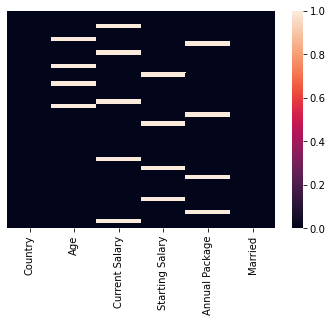

In [12]:
sns.heatmap(data_raw.isnull(), yticklabels=False)

### Elimination of Null Values from the dataset

There are different methods to get eliminate the null values in the dataset:
- Deleting the rows which contains null values
- Replacing the null cells with a particular values (or mean of the column)
- Interpolating the dataset (ie, Replacing null cells with the mean of its neighbours)

In [13]:
#Deleting all the rows containing any Null cell in dataset
data=data_raw.dropna() 

#Fills the Null cells with 0 if (0), (method='bfill') for backfill, (method='ffill') for fwdfill
#data=data_raw.fillna(0)

#Fill the null values with arithematic mean of column
#data=data_raw.fillna(data_raw.mean())

#Interpolating the null values
#data=data_raw.interpolate()

data

,Country,Age,Current Salary,Starting Salary,Annual Package,Married
0,France,45.0,56000.0,20000.0,692000.0,Yes
1,Spain,26.0,26000.0,10000.0,322000.0,No
2,Germany,26.0,25000.0,10000.0,310000.0,Yes
4,Germany,45.0,35000.0,10000.0,430000.0,No
5,France,59.0,9300.0,15000.0,16116.0,No
8,Germany,25.0,650000.0,30000.0,7830000.0,No
10,Germany,25.0,65000.0,10000.0,790000.0,No
11,India,28.0,65000.0,10000.0,790000.0,Yes
13,Spain,25.0,15000.0,10000.0,190000.0,No
15,Germany,45.0,54000.0,25000.0,673000.0,No


In [14]:
#Again Ensuring the presence of any null values

data.isnull().any() #Checks if there is any null value
#data.isnull().sum() #Calculates the total Null Values present
#sns.heatmap(data.isnull(), yticklabels=False) #Shows the Heat-Map of null values in the dataset
#data.count() #Shows total number of values present in each column

Country            False
Age                False
Current Salary     False
Starting Salary    False
Annual Package     False
Married            False
dtype: bool

### Checking the properties of the dataset

In [15]:
data.info()
#To show the basic info about the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          32 non-null     object 
 1   Age              32 non-null     float64
 2   Current Salary   32 non-null     float64
 3   Starting Salary  32 non-null     float64
 4   Annual Package   32 non-null     float64
 5   Married          32 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.8+ KB


**Creating different DataFrames for object-based and non-object based computations**

Some methods only run for interger and float variables. Therefore it is better to create a dataframe excluding Objects.

In [16]:
df = data.select_dtypes(exclude = 'object')
df.shape

(32, 4)

In [17]:
obj_df = list(set(df.columns).symmetric_difference(data.columns))
obj_df

['Married', 'Country']

In [18]:
#Shows the arithematic properties of the dataset
data.describe()

,Age,Current Salary,Starting Salary,Annual Package
count,32.000000,3.200000e+01,32.000000,3.200000e+01
mean,38.937500,2.349469e+05,21125.000000,2.833660e+06
std,19.594169,9.614950e+05,18440.400947,1.154308e+07
min,3.000000,6.000000e+03,1000.000000,1.300000e+04
25%,25.000000,2.575000e+04,10000.000000,3.190000e+05
50%,30.000000,4.500000e+04,15000.000000,5.500000e+05
75%,52.000000,6.100000e+04,30000.000000,7.670000e+05
max,96.000000,5.466000e+06,100000.000000,6.562700e+07


cols = data.columns
l = len(cols)
cols, l

In [19]:
#Display total number of data in the dataframe (rows,columns)
data.shape

(32, 6)

### Execution of duplicate rows

**Detection:**

In [20]:
#Collect duplicate rows in the dataset
duplicate = data[data.duplicated()]
print(duplicate.count()) #To show the total number of duplicate rows in the dataset

Country            2
Age                2
Current Salary     2
Starting Salary    2
Annual Package     2
Married            2
dtype: int64


If all the values are 0, then there are no duplicate rows in the dataset.

We can also see the list of rows which are duplicates. If there is no duplicate rows then it will only display the attribute names

In [21]:
#Print the duplicate rows
printduplicate

NameError: name 'printduplicate' is not defined

**Deletion:**

In [ ]:
#Deleting duplicate values
data = data.drop_duplicates()
duplicate = data[data.duplicated()]
data = data.dropna()
duplicate.count()

Now we can see here that the duplicates for all the attributes is showing zero, so there are no more duplicate rows in the dataset

In [ ]:
data.shape

### Correlation Matrix and Heatmap

In [ ]:
corrMat = data.corr()
corrMat

In [ ]:
data

In [ ]:
#Visualizing in Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corrMat, cmap='coolwarm', annot=True)
plt.show()

### Principal Component Analysis

In [ ]:
X = np.random.randint(10,50,100).reshape(20,5) 
X_meaned = X - np.mean(X, axis=0)

In [ ]:
cov_mat = np.cov(X_meaned , rowvar = False)

In [ ]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [ ]:
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [ ]:
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [ ]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

In [ ]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [ ]:
#Applying it to PCA function
mat_reduced = PCA(df , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df] , axis = 1)

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , s = 60)

### Detecting Outliers

In [ ]:
data.shape

In [ ]:
for col in df.columns:
    sns.boxplot(data[col])
    plt.show()

#### Eliminating Outliers

In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
print(iqr)

In [ ]:
data = data[~((data < (q1 - 1 * iqr)) | (data > (q3 + 1 * iqr ))).any(axis=1)]
data.shape

In [ ]:
for col in df.columns:
    sns.boxplot(data[col])
    plt.show()

### Histogram

In [ ]:
if 'id' in data.columns:
    x = data.drop(columns=['id'])
elif 'Id' in data.columns:
    x = data.drop(columns=['Id'])
elif 'ID' in data.columns:
    x = data.drop(columns=['ID'])
else:
    x = data

In [ ]:
x.columns

In [ ]:
for col in x.columns:
    plt.figure(figsize=(5,3))
    plt.hist(x[col])
    plt.xlabel(col)
    plt.show()

### Scatter Plot

Plotting all possible Combinations of Scatterplot Graphs 

In [ ]:
obj_df

**Plotting a combined Scatterplot Graph**

Using seaborn

In [ ]:
#Simple Visualization without object parameters
sns.pairplot(x)

In [ ]:
#Visualization with object parameters
#Might get stuck for datasets with large number of features or more elements in obj_df
#i=-1
if(len(obj_df)!=0):
    for i in range(len(obj_df)):
        sns.pairplot(x, hue=obj_df[i])
        plt.show()

**Plotting all possible combinations in different scatterplot graphs**

Using Matplotlib

In [ ]:
cols = df.columns
for i in range(len(cols)):
    j=i+1
    for j in range(len(cols)):
        if (i<j):
            plt.figure(figsize=(5,3))
            plt.scatter(data[cols[i]], data[cols[j]])
            plt.xlabel(cols[i])
            plt.ylabel(cols[j])
            plt.show()

### Saving the Processed Data
The whole processsed data is saved the same directory with the name of "Processed_Data.xlsx"

In [ ]:
data.to_excel('processed_data.xlsx', index=False)